In [14]:
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.frequencies import to_offset


In [18]:
data_path = './data/Columbia_clean/Residential_1.csv'
data = pd.read_csv(data_path, index_col=0)
data.head()

,energy_kWh
2012-06-01 01:00:00,1.011
2012-06-01 02:00:00,0.451
2012-06-01 03:00:00,0.505
2012-06-01 04:00:00,0.441
2012-06-01 05:00:00,0.468


In [21]:
data.index = pd.to_datetime(data.index)
data.head()

,energy_kWh
2012-06-01 01:00:00,1.011
2012-06-01 02:00:00,0.451
2012-06-01 03:00:00,0.505
2012-06-01 04:00:00,0.441
2012-06-01 05:00:00,0.468


In [26]:
data = data[~data.index.duplicated()]

In [28]:
data = data.asfreq(data.index.freq or to_offset(data.index[1] - data.index[0]).freqstr)
granularity = data.index.inferred_freq
print('Data granularity is ',granularity)
print('\n')

Data granularity is  H




In [31]:
data.isna().sum()

energy_kWh    29
dtype: int64

In [ ]:
data = data.interpolate()

<AxesSubplot:>

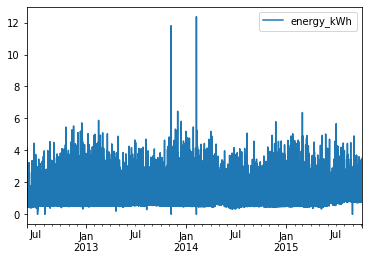

In [33]:
data.plot()

In [34]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

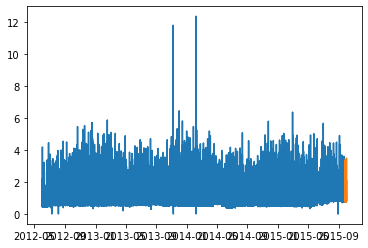

In [35]:
train = data[:-168]
test = data[-168:]
plt.plot(train)
plt.plot(test)

In [ ]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=1, max_p=3, max_d=3, max_q=3, start_P=0, D=1, start_Q=1, m=24, seasonal=True, error_action='warn', trace=True, supress_warnings=False, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=96.77 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=77924.718, Time=4.17 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=64129.876, Time=35.09 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=72272.114, Time=5.76 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=60909.012, Time=135.74 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=289.55 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=116.25 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=66701.302, Time=47.85 sec
 ARIMA(2,1,0)(2,1,0)[24]             : AIC=59152.334, Time=99.08 sec
 ARIMA(2,1,0)(1,1,0)[24]             : AIC=62299.154, Time=39.71 sec
 ARIMA(2,1,0)(2,1,1)[24]             : AIC=inf, Time=316.23 sec
 ARIMA(2,1,0)(1,1,1)[24]             : AIC=inf, Time=135.72 sec
 ARIMA(3,1,0)(2,1,0)[24]             : AIC=58171.102, Time=120.87 sec
 ARIMA(3,1,0)(1,1,0)[24]             : AIC=61341.734, Time=52.42 sec


In [ ]:
arima_model.summary()

In [9]:
import statsmodels.api as sm

In [12]:
self.data = self.data.asfreq(self.data.index.freq or to_offset(self.data.index[1] - self.data.index[0]).freqstr)
            self.granularity = self.data.index.inferred_freq
            print('Data granularity is ',self.granularity)
            print('\n')

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

In [11]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(3, 1, 0),
                                seasonal_order=(2, 1, 0, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

/home/ubuntu/anaconda3/envs/evgeny/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/ubuntu/anaconda3/envs/evgeny/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


KeyboardInterrupt: 